In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

In [2]:
# Function to record change in initaial state after movement of bike from one college to another.

def bike_to_s1(s1, s2):
    '''
    Move one bike to station 2 to station 1
    s1: station 1
    s2: station 2
    returns tuple (the change of status at stations after moving the bike)
    '''
    s1 += 1
    s2 -= 1
    return(s1, s2)

def bike_to_s2(s1, s2):
    '''
    Move one bike to station 1 to station 2
    s1: station 1
    s2: station 2
    returns tuple (the change of status at stations after moving the bike)
    '''
    s1 -= 1
    s2 += 1
    return(s1, s2)

In [3]:
s1 = 10
s2 = 2

t1, t2 = bike_to_s1(s1, s2)
print(f"t1: {t1}\nt2: {t2}")

t1: 11
t2: 1


In [4]:
bike_to_s2(s1, s2)

(9, 3)

In [5]:
# Function to return boolean (True/False) given a probability parameter

def flip(p=0.5):
    """Flips a coin with the given probability.
    p: float 0-1
    returns: boolean (True or False)
    """
    return np.random.random() < p

In [6]:
# verify the function

flip(0.7)

False

### Given:
* Students arrive at Oline every 2 minutes.
* Students arrive at Wellesley every 3 minutes.

Hence, probability of arrival during any one-minute period:

* for Oline: 0.5
* for Wellesley: 0.33

In [7]:
# Function to simulate time step (one-minute):

def step(s1, s2, p1, p2):
    '''
    Movement of bike for given time step (one-minute)
    s1: Station 1
    s2: Station 2
    p1: P(Station 1), Probability of student's arrival at station 1 during any one-minute period.
    p2: P(Station 2), Probability of student's arrival at station 2 during any one-minute period.
    Returns tuple (status at stations after moving the bike)
    '''
    if flip(p1):
        t1, t2 = bike_to_s2(s1, s2)
        s1, s2 = t1, t2
    if flip(p2):
        t1, t2 = bike_to_s1(s1, s2)
        s1, s2 = t1, t2
    return(s1, s2)

In [8]:
s1 =10
s2 =2
p1 = 0.5
p2 = 0.33


In [10]:
# Time Series

s1 =10
s2 =2
p1 = 0.5
p2 = 0.33
result_s1 = []
result_s2 = []

for i in range(60):
    t1, t2 = step(s1, s2, p1, p2)
    result_s1.append(t1)
    result_s2.append(t2)
    s1, s2 = t1, t2

<IPython.core.display.Javascript object>


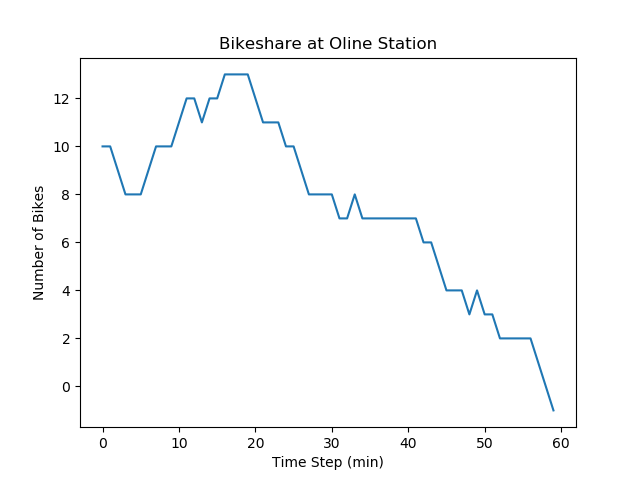

In [11]:
plt.plot(result_s1)
plt.xlabel("Time Step (min)")
plt.ylabel("Number of Bikes")
plt.title("Bikeshare at Oline Station")
plt.show()

### Some of the deficiency in present model
* Student is equally likely to arrrive during any one-minute period through out the day. In reality, probability varies depending on time of day, day of the week, etc.
* Model does not account for travel time from one station to another.
* Model does not check whether a bike is available or not.

In [102]:
# Function to record student at station

def student_at_station(prob):
    '''
    Checks whether student is at station for given probability for that station.
    station: station name
    prob: probability of arriving student during any one-minute period.
    returns True if student arrives, false ortherwise.
    '''
    if flip(prob):
        nums_student += 1
    
    return nums_student

* average bike speed = 9 miles/hr
* distance (s1 to s2) = 3 miles
* time taken (s1 to s2 and vice-versa) = 20 min

Means if a bike leaves any station it will be available at another station after 20 min.

In [97]:
# Function to record change in initaial state after movement of bike from one college to another.
# Check if bike is available
# Record student returned due to non availability of bike

def move_to_s1(s1, s2, s2_empty=0):
    '''
    Move one bike to station 2 to station 1
    s1: station 1
    s2: station 2
    s1_empty: student with no bike available at station 1
    s2_empty: student with no bike available at station 2
    returns tuple (the change of status at stations after moving the bike)
    '''
    if s2 > 0:
        s1 += 1
        s2 -= 1
    elif s2 ==0:
        s2_empty += 1
    
    return(s1, s2, s2_empty)

def move_to_s2(s1, s2, s1_empty=0):
    '''
    Move one bike to station 1 to station 2
    s1: station 1
    s2: station 2
    s1_empty: student with no bike available at station 1
    s2_empty: student with no bike available at station 2
    returns tuple (the change of status at stations after moving the bike)
    '''
    if s1 > 0:
        s1 -= 1
        s2 += 1
    elif s1 == 0:
        s1_empty += 1
    
    return(s1, s2, s1_empty)

In [119]:
# rewrite Step functions to accomodate nums_student and availability of bike at any given point of time

def step_modified(s1, s2, p1, p2, s1_empty=0, s2_empty=0):
    '''
    Movement of bike for given time step (one-minute)
    s1: Station 1
    s2: Station 2
    p1: P(Station 1), Probability of student's arrival at station 1 during any one-minute period.
    p2: P(Station 2), Probability of student's arrival at station 2 during any one-minute period.
    ns1: initial number of students at Station 1, default_value = 0
    ns2: initial number of students at Station 2, default_value = 0
    s1_empty: student with no bike available at station 1
    s2_empty: student with no bike available at station 2
    Returns tuple (status at stations after moving the bike)
    '''
    if flip(p1):
        # check bikes are available 
        s1, s2, s1_empty = move_to_s2(s1, s2, s1_empty) # actually bike will be available after 20 minutes, TODO: write code
            # decrease number of students at that station
        #print(f"At station 1:\ns1_empty = {s1_empty}\ns1 = {s1}\ns2 = {s2}")
   
    if flip(p2):
        # check bikes are available
        s1, s2, s2_empty = move_to_s1(s1, s2, s2_empty) # actually bike will be available after 20 minutes, TODO: write code
            # decrease number of students at that station
        #print(f"At station 2:\ns2_empty = {s2_empty}\ns1 = {s1}\ns2 = {s2}")
  
    return(s1, s2, s1_empty, s2_empty)

In [117]:
# verify the above function
s1, s2, ns1, ns2=step_modified(s1=10, s2=2, p1=0.5, p2=0.33)
print(f"s1: {s1}\ns2: {s2}")

At station 2:
s2_empty = 0
s1 = 11
s2 = 1
s1: 11
s2: 1


In [118]:
# Functions to run simulation

def simulate_bikeshare(s1, s2, p1, p2, s1_empty=0, s2_empty=0, t=60):
    '''
    Simulate Bike share at two stations
    s1: Station 1
    s2: Station 2
    p1: P(Station 1), Probability of student's arrival at station 1 during any one-minute period.
    p2: P(Station 2), Probability of student's arrival at station 2 during any one-minute period.
    ns1: initial number of students at Station 1, default_value = 0
    ns2: initial number of students at Station 2, default_value = 0
    t: n minutes, defaul_value = 60
    return tuple(list of time-series values for given time period of stations)
    '''
    res_s1 = []
    res_s2 = []
    
    for i in range (t):
        #print(f" For i = {i}")
        s1, s2, s1_empty, s2_empty = step_modified(s1, s2, p1, p2, s1_empty, s2_empty)
        res_s1.append(s1)
        res_s2.append(s2)
        #print("------------------------------------")
        
    return(res_s1, res_s2, s1_empty, s2_empty)
    

In [128]:
res_s1, res_s2, s1_empty, s2_empty = simulate_bikeshare(s1=10, s2=2, p1=0.5, p2=0.33, s1_empty=0, s2_empty=0, t=60)

In [129]:
s1_empty

5

In [130]:
s2_empty

0

<IPython.core.display.Javascript object>


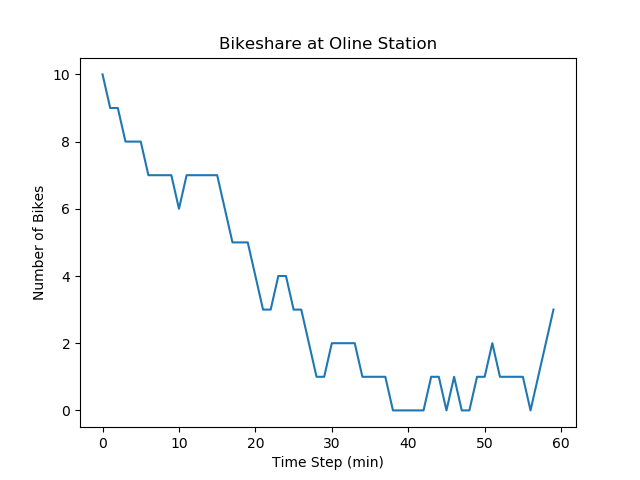

In [131]:
plt.plot(res_s1)
plt.xlabel("Time Step (min)")
plt.ylabel("Number of Bikes")
plt.title("Bikeshare at Oline Station")
plt.show()

<IPython.core.display.Javascript object>


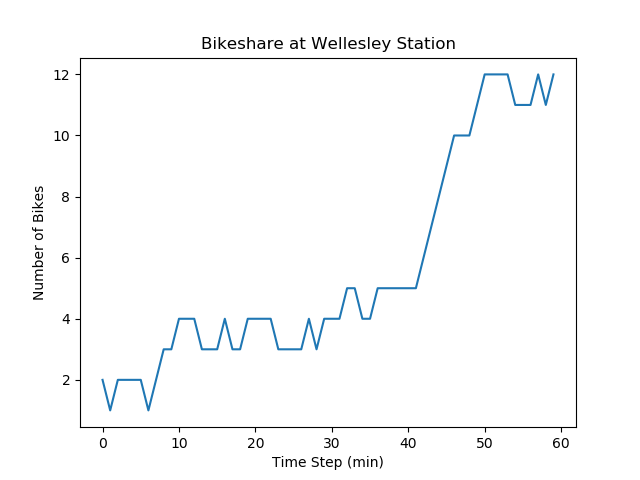

In [67]:
plt.plot(res_s2)
plt.xlabel("Time Step (min)")
plt.ylabel("Number of Bikes")
plt.title("Bikeshare at Wellesley Station")
plt.show()